# Shubham Paliwal
# Recommandation System for Movielens Dataset - Kaggle

### The Age of Recommender Systems

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.

They are used to predict the rating or preference that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. Moreover, companies like Netflix and Spotify depend highly on the effectiveness of their recommendation engines for their business and sucees.

#### In this kernel we'll be building a baseline Movie Recommendation System using Movielens Dataset.




### There are basically three types of recommender systems:-

#### Demographic Filtering- 
They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

#### Content Based Filtering- 
They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

#### Collaborative Filtering- 
This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.



In this notebook we are going to implement content based recommendation system

### Importing essential libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  #this line gives you an edge that you no need to type plot.shoe() to show your chart

UsageError: unrecognized arguments: #this line gives you an edge that you no need to type plot.shoe() to show your chart


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [3]:
import pyforest 

In [4]:
!pip install wordcloud

In [5]:
from wordcloud import WordCloud

### Loading the Dataset:


The data consists of 105339 ratings applied over 10329 movies.

The movies.csv dataset contains three columns:

    movieId: the ID of the movie
    title: movies title
    genres: movies genres

The ratings.csv dataset contains four columns:

    userId: the ID of the user who rated the movie.
    movieId: the ID of the movie
    ratings: ratings given by each user (from 0 to 5)
    Timstamp: The time the movie was rated.



In [6]:
import os
os.chdir('D:\BML Gurgaon\Analytics_Extras\DataSets\Modelling\Movielens Dataset_Recommandation Sysytem')
os.getcwd()

'D:\\BML Gurgaon\\Analytics_Extras\\DataSets\\Modelling\\Movielens Dataset_Recommandation Sysytem'

In [7]:
movie = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [8]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [10]:
movie.info()
print("___________.......................______________")
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB
___________.......................______________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [11]:
# Dimension of datasets:
print("Dimension of Movie Dataset is")
movie.shape

Dimension of Movie Dataset is


(10329, 3)

In [12]:
print("Dimension of Ratings Dataset is")
ratings.shape

Dimension of Ratings Dataset is


(105339, 4)

In [13]:
movie.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [14]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


From the above table we can conclue that in the give dataset:

    The average rating is 3.50 and minimum and maximum rating is 0.5 and 5 respectively.
    There are 668 user who has given their ratings for 149532 movies.



# To generate wordcloud seperate each string for its count into a list:

In [16]:
genres=[]
for genre in movie.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movie.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)    

In [17]:
# Format of both the cloud 
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2,min_word_length=3).generate(movie_title)

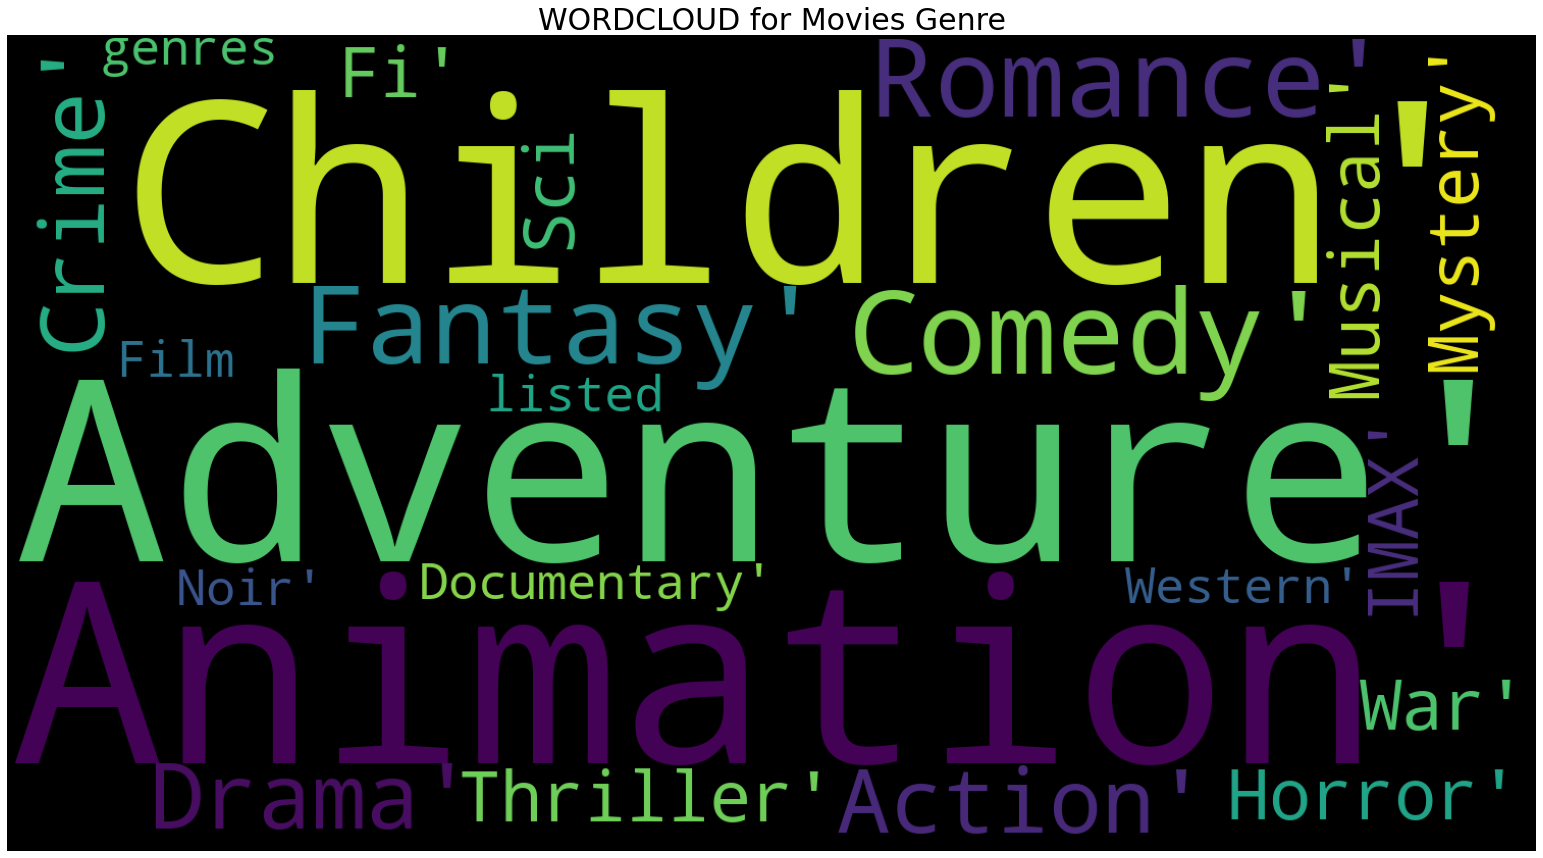

In [18]:
plt.figure(figsize=(30,15))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

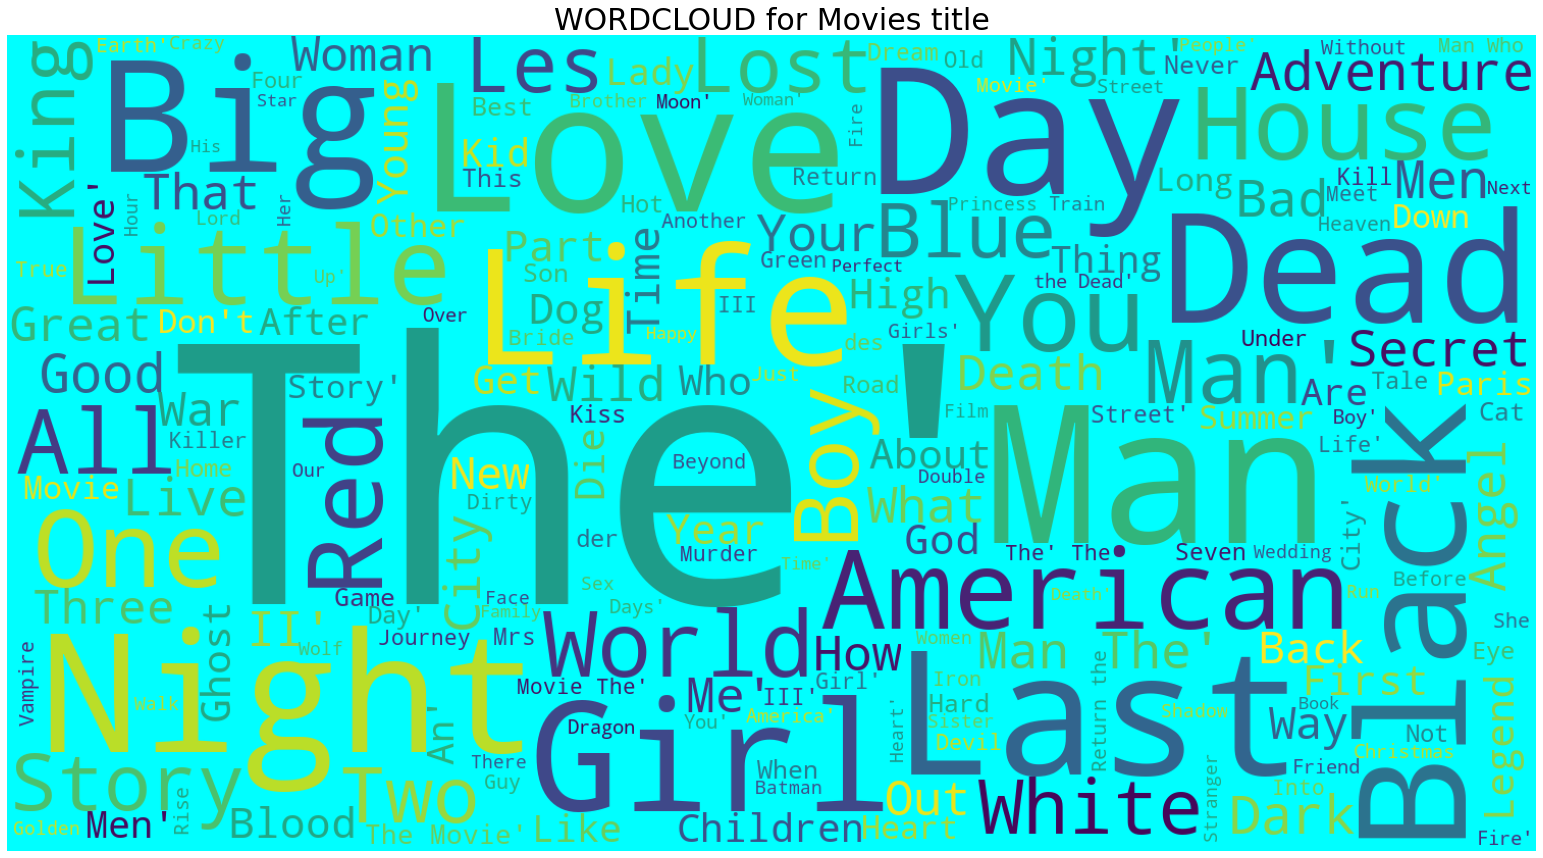

In [19]:
plt.figure(figsize=(30,15))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title)

## Now we will gonna merge both the dataset:

In [20]:
df = pd.merge(ratings,movie, how='left', on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


### Sum of rating of all the rated movies and top 20 high rated movies table and diagram:

In [22]:
df1=df.groupby(['title'])[['rating']].sum()
df1.head(10)

,rating
title,
'71 (2014),3.5
'Hellboy': The Seeds of Creation (2004),3.0
'Round Midnight (1986),2.5
'Til There Was You (1997),12.0
"'burbs, The (1989)",62.5
'night Mother (1986),3.0
(500) Days of Summer (2009),145.5
*batteries not included (1987),36.5
...And Justice for All (1979),36.5


In [23]:
high_rated=df1.nlargest(20,'rating') # by default first 20 rated movies
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text major ticklabel objects>)

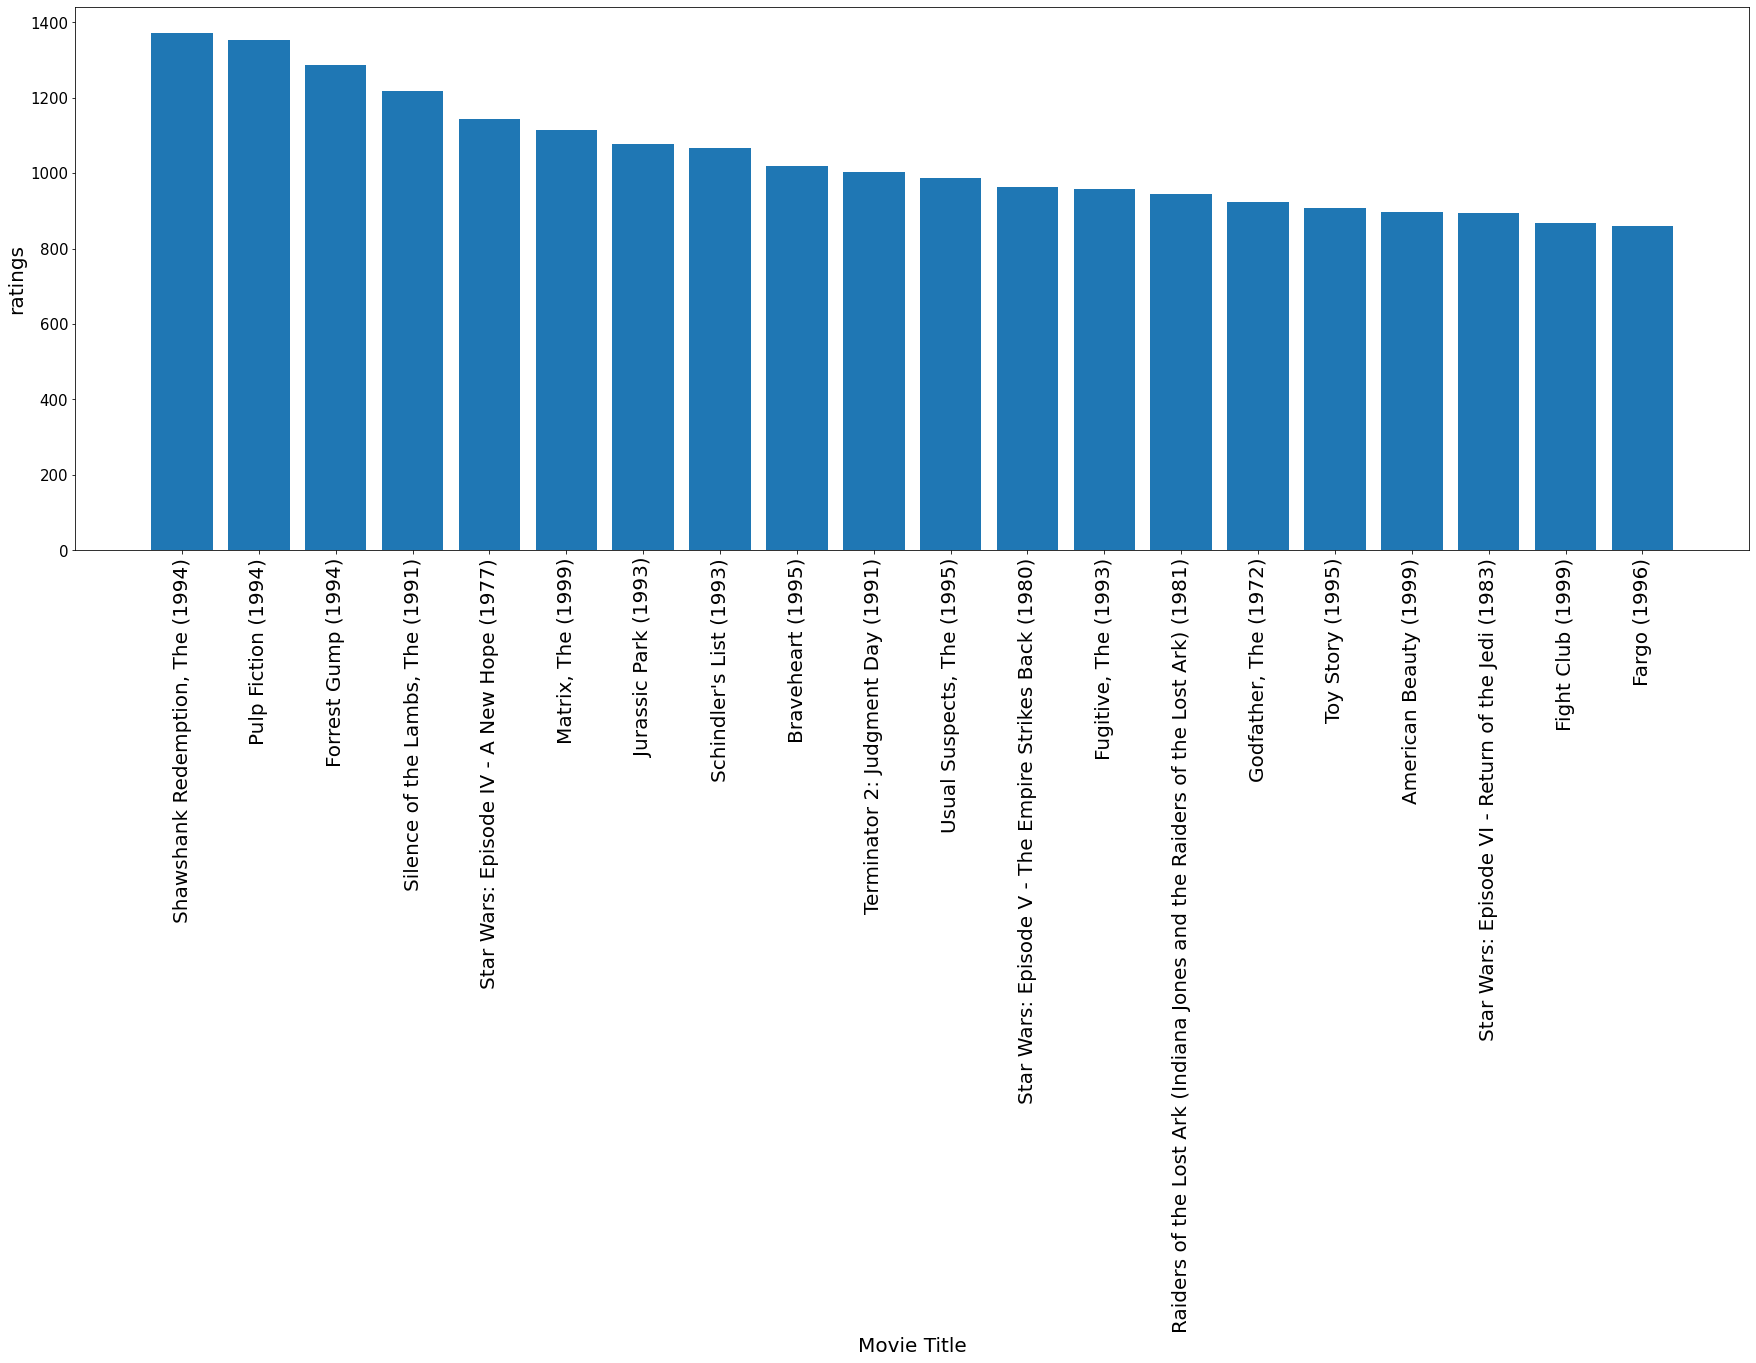

In [24]:
plt.figure(figsize=(30,10))
plt.bar(high_rated.index,high_rated['rating'])
plt.ylabel('ratings', fontsize=20)
plt.xticks(fontsize=20,rotation=90)
plt.xlabel('Movie Title', fontsize=20)
plt.yticks(fontsize=15)

In [25]:
# after viewing the sum let's check the count of the movies rating how many time movies are rated:
df2=df.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


<BarContainer object of 20 artists>

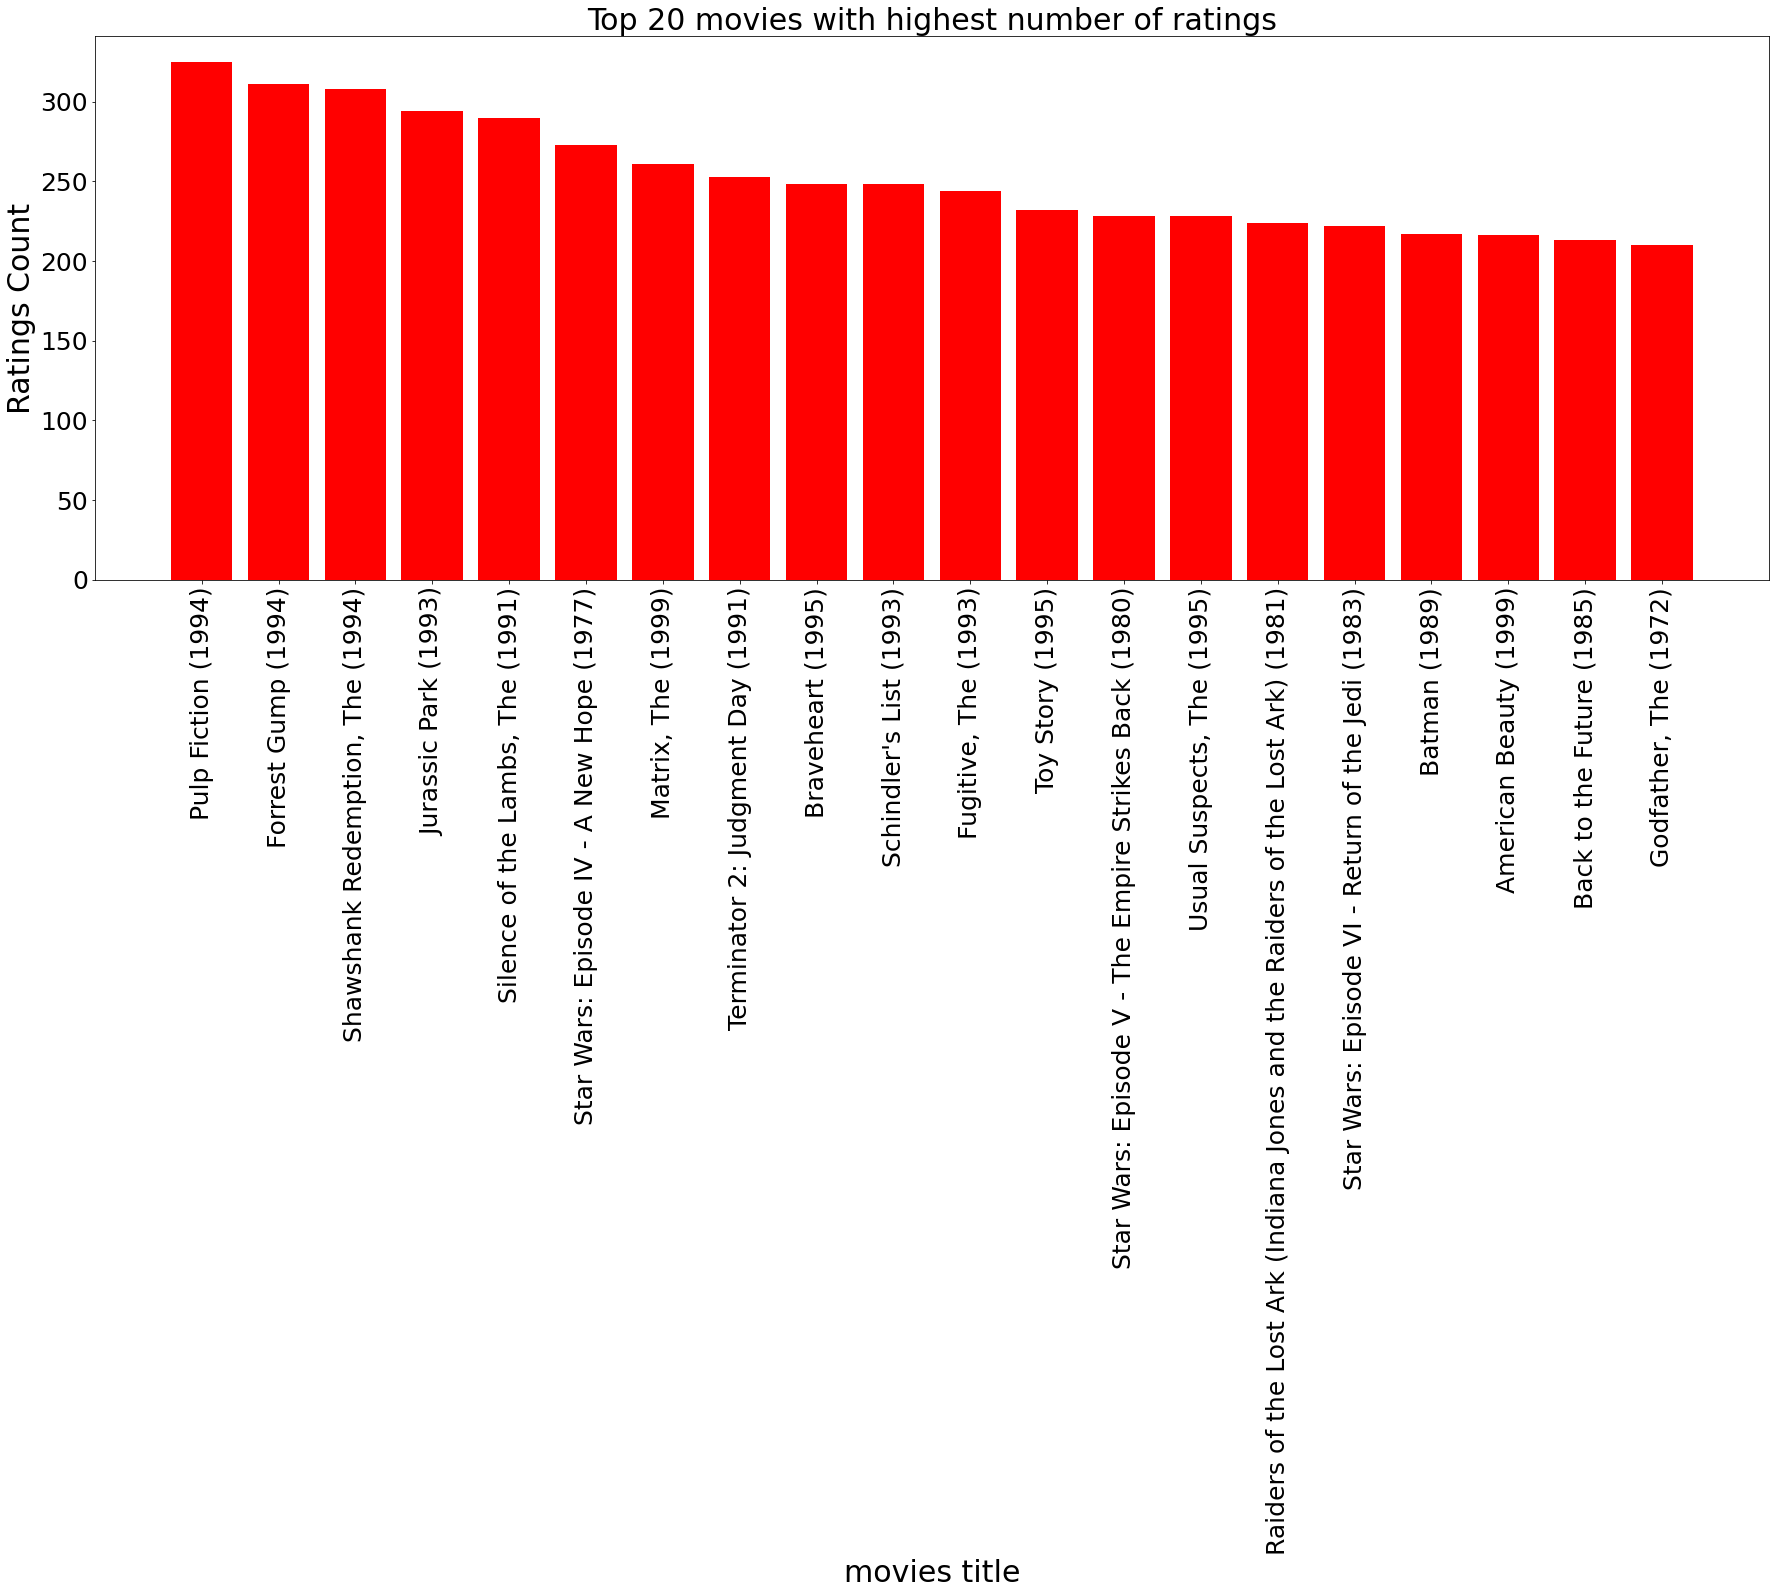

In [26]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('Ratings Count',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating,color='red')

# Content Based Filtering¶


Content Based Filtering

In this recommender system the content of the movie (genres, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

### Plot description based Recommender

For any of you who has done even a bit of text processing before knows we need to convert the word vector of each overview. Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as (term instances/total instances). Inverse Document Frequency is the relative count of documents containing the term is given as log(number of documents/documents with term) The overall importance of each word to the documents in which they appear is equal to TF * IDF

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it

In [27]:
#term frequency inverse document frequency:
#Define a TF-IDF Vectorizer Object
CV=TfidfVectorizer()

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix=CV.fit_transform(movie['genres'])

In [28]:
#Output the shape of tfidf_matrix
tfidf_matrix.shape

(10329, 24)

In [29]:
#Creating a pivot table array for our customize view:
movie_user = df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Suppose a user wants to watch a movie similar to burbs, The (1989) then we can recommend the user by calculating the cosine similarity between burbs, The (1989) and other movies. So we have to first find the cosine similarity between the movies of data.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

#### We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

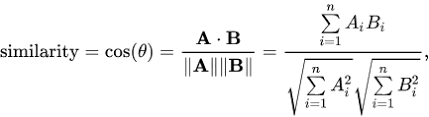

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [30]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

### We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [31]:
#Construct a reverse map of indices and movie titles
indices=pd.Series(movie.index,index=movie['title']).drop_duplicates()

In [32]:
indices

title
Toy Story (1995)                           0
Jumanji (1995)                             1
Grumpier Old Men (1995)                    2
Waiting to Exhale (1995)                   3
Father of the Bride Part II (1995)         4
                                       ...  
Cosmic Scrat-tastrophe (2015)          10324
Le Grand Restaurant (1966)             10325
A Very Murray Christmas (2015)         10326
The Big Short (2015)                   10327
Marco Polo: One Hundred Eyes (2015)    10328
Length: 10329, dtype: int64

### We are now in a good position to define our recommendation function. These are the following steps we'll follow :-

    -Get the index of the movie given its title.
    -Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples  where the first element is its position and the second is the similarity score.
    -Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
    -Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
    -Return the titles corresponding to the indices of the top elements.



In [33]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movie['title'].iloc[movie_indices]

# without explaination:

#titles=movies['title']
#def recommendations(title):
 #   idx = indices[title]
  #  sim_scores = list(enumerate(cosine_sim[idx]))
   # sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
   # sim_scores = sim_scores[1:21]
    #movie_indices = [i[0] for i in sim_scores]
    #return titles.iloc[movie_indices]

In [34]:
# # Top 10 Similar movies to Toy Story (1995):
get_recommendations('Toy Story (1995)')

1815                                          Antz (1998)
2496                                   Toy Story 2 (1999)
2967       Adventures of Rocky and Bullwinkle, The (2000)
3166                     Emperor's New Groove, The (2000)
3811                                Monsters, Inc. (2001)
6617    DuckTales: The Movie - Treasure of the Lost La...
6997                                     Wild, The (2006)
7382                               Shrek the Third (2007)
7987                       Tale of Despereaux, The (2008)
9215    Asterix and the Vikings (Astérix et les Viking...
Name: title, dtype: object

In [35]:
# Top 10 Similar movies to Pulp Fiction (1994):
get_recommendations('Pulp Fiction (1994)')

537                                          Fargo (1996)
841                                        Freeway (1996)
2606    Man Bites Dog (C'est arrivé près de chez vous)...
4495               Confessions of a Dangerous Mind (2002)
4771                                Hard Word, The (2002)
6897                                    Cul-de-sac (1966)
7620                                     In Bruges (2008)
7972                                     Nobel Son (2007)
8233                               Informant!, The (2009)
8474                               Leaves of Grass (2009)
Name: title, dtype: object

In [36]:
# Top 10 Similar movies to Jumanji 1995:
get_recommendations('Jumanji (1995)')

55                     Indian in the Cupboard, The (1995)
112                     NeverEnding Story III, The (1994)
817                       Escape to Witch Mountain (1975)
1604            Darby O'Gill and the Little People (1959)
1652                                  Return to Oz (1985)
1716                        NeverEnding Story, The (1984)
1717    NeverEnding Story II: The Next Chapter, The (1...
1908                        Santa Claus: The Movie (1985)
3817    Harry Potter and the Sorcerer's Stone (a.k.a. ...
6471                            Magic in the Water (1995)
Name: title, dtype: object

In [37]:
get_recommendations('Casino (1995)')

29     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
35                               Dead Man Walking (1995)
89                               Hate (Haine, La) (1995)
105                Young Poisoner's Handbook, The (1995)
215                              The Glass Shield (1994)
217                            Heavenly Creatures (1994)
237                                 Little Odessa (1994)
252                              New Jersey Drive (1995)
255                            Once Were Warriors (1994)
279                     Shawshank Redemption, The (1994)
Name: title, dtype: object

## As you can see, our system has done a decent job of finding movies with similar plot descriptions.